# Assignment 9: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

## Part A (1 Mark)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

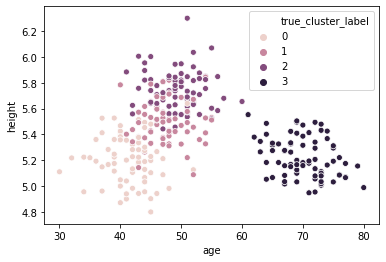

In [57]:
age_height_df = pd.read_csv('age_height_data.csv')
age_height_df.head()
#sns.pairplot(data=age_height_df, hue = 'true_cluster_label')
sns.scatterplot(x="age", y="height", data = age_height_df, hue = 'true_cluster_label')

In [58]:
#If we use pairplot we can see that the scatter plot of height w.r.t age is similar to the one that has been created using scatter plot
#I know this is not necessary but just to make sure the scatter plot above is correct
#age_height_df = pd.read_csv('age_height_data.csv')
#age_height_df.head()
#sns.pairplot(data=age_height_df, hue = 'true_cluster_label')

## Part B (1 Mark)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

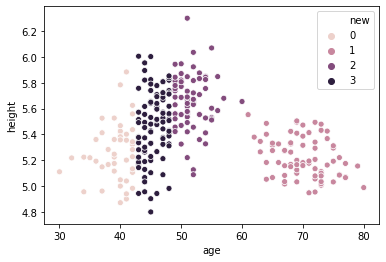

In [59]:
#inplace=True Ask this
data_needed = age_height_df.drop('true_cluster_label', axis='columns').astype('float').values
k_mean_pipe = Pipeline([
    ('kmean',KMeans(n_clusters=4))
])
age_height_df['new'] = k_mean_pipe.fit_predict(data_needed)
second_df = age_height_df
#sns.pairplot(data=age_height_df, hue = 'new')
sns.scatterplot(x="age", y="height", data = second_df, hue = 'new')
#The following returns similar output
#data_needed = age_height_df[['age', 'height']].values
#k_mean_pipe = Pipeline([
#    ('kmean',KMeans(n_clusters=4))
#])
#age_height_df['new'] = k_mean_pipe.fit_predict(data_needed)
#sns.pairplot(data=age_height_df, hue = 'new')

## Part C (1 Mark)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

In [ ]:
No it does not look like the true cluster labels. Beceuase we have not standardized the features yet thats why they behave badly. Indeed age and height are measured differently and are not comparable scales
I mean they have different units of measurement.

Answer here!

## Part D (1 Mark)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

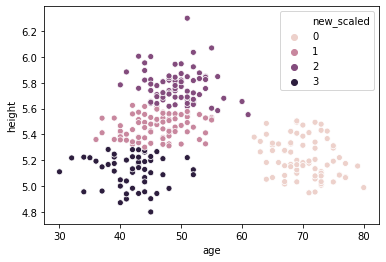

In [60]:
new_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('kmean',KMeans(n_clusters=4))
])
age_height_df['new_scaled'] = new_pipe.fit_predict(data_needed)
third_df = age_height_df
#sns.pairplot(data=age_height_df, hue = 'new_scaled')
sns.scatterplot(x="age", y="height", data = third_df, hue = 'new_scaled')

In [45]:
Yes the scaling has helped to be as close as possible to the true results and this is because of standardization

## Part E (1 Mark)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Create an elbow plot for this data.

scores: [298.26369726 138.45630669  98.48236725  79.74159909  65.1464822
  57.50916659  51.69547654  46.73488026  42.81365855  40.05611502
  35.49624012  32.40475576  29.81834899  28.36465455  26.15671341
  25.25049018]


Text(0, 0.5, 'scores')

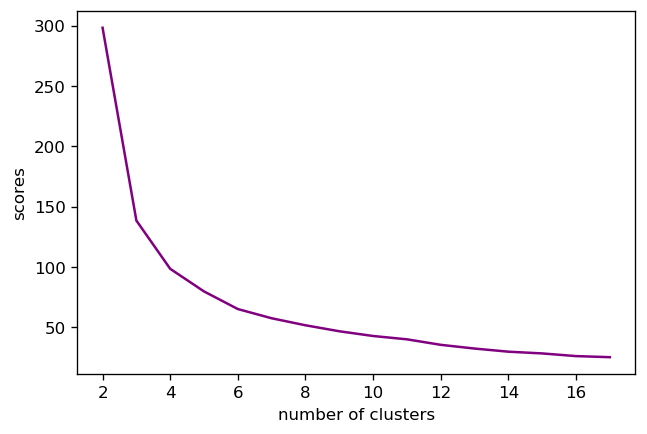

In [72]:
#number_of_rows = age_height_df.shape[0]
sqrt_number_of_rows  = 17
std_out = preprocessing.scale(data_needed) 
zero_array = np.zeros(16)
#scaler_model = StandardScaler()
#data_1= scaler_model.fit_transform(df)
for i in range(2, 18):
    model_Kmean = KMeans(n_clusters=i).fit(std_out)
    zero_array[i-2] = -model_Kmean.score(std_out)
print(f"scores: {zero_array}")
x_axis = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_axis = zero_array
fig, ax = plt.subplots(dpi=120)
ax.plot(x_axis, y_axis, color="purple")
plt.xlabel('number of clusters')
plt.ylabel('scores')
#print(zero_array)    
    #model_fit = model_Kmean.fit(std_out)
    #print('score'.format(model_fit.score))
    #zero_array[i] = model_fit.score
#    new_pipe = Pipeline([
#   ('scale', StandardScaler()),
#   ('kmean',KMeans(n_clusters=i))
#])
#    new_pipe = KMeans.score(scaler_model)
#    zero_array = new_pipe.fit(data_needed)
#print('score'.format(new_pipe.fit(data_needed).score))
#print('hi'.format(zero_array))
    #zero_array[i] = new_pipe.fit(data_needed).score



## Part F (1 Mark)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

It is at 4 as number of clusters. Indeed we do not have substantional decrease in score after 4.
Here by score I mean apposite of .score (which is a negative number but I multiply it by -1 to get the score in the plot)
Indeed, when we add more than 4 clusters the algorithm objective functions does not decrease quickly. Thats why elbow is at 4.

## Part G (4 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

Answer here!

In [ ]:
1) The author starts with a simple example to clarify the existing conflict in the definition of clustring.  Suppose that we have a line
with a group of elements (which are next to each other) scattered on it. Now the first part of the definition says "every pair of close by elements share the same cluster" because of this we need put all the elements 
in a single joint cluster. But this clustring vilotates the second part of the definition. Indeed, we now have dissimilar points sharing the 
same cluster. The author then name the "clustring imposibility theorem" and explain the idea behind clustring is to find clusters so that 
the relation "x and y belong to the same cluster " is an approximation to "x is similar to y". To be more precise, the first sensetence is a transitive relation but the second sentense may not.

2) The author mentions that the theoretical understanding of clustering is very elementary. Another point is that one of the main chanlenges of
clustering is model selection and in clustering different algorithms returns different outputs. Thus, selecting a clustering algorithm and the
corresponding parameters are of utmost importance in this regard. But there is no ( methodological/theoretical) guidence on how to choose the algorithm and 
parameters. The author further explains that the theoretical papers on clustering chooses a concerete clustering objective and focus on 
the corresponding optimization problem and try to provide savings on the resources required for this purpose.
Clustering is an ill-defined problem and it is vague that for a given data set which clustering is suitable. And when a user wants to choose
algorithm and parameters he/she recourse to ad hoc methods. He further addresse some conflics in clustering. Except for the given definition of clustering 
that contains potential conflicts (see question 1 ) that does not indicate how the conflict can be fixed either there are other conflicts as well (indeed)
some properties might be valid under some possible circumstances. For instance, how we can keep balance between different members of clusters 
or whether or not those members are robust under small perturbation. And there exist data sets for which these conditions cannot be held.
Furtheremore, many papers in conferences talk about run time, propose examples of data sets with great results (they might give a few algorithsm as well)
But we can see in their papers that based on which clustering properties they claim that their proposed algorithms is different from others. They do not 
indicate that if their algorithms are useful for applications (which applications) and do not clarify why they are useful. And researhcers do
not focus on algorithmic selection aspect and instead focus on minimization of clustering objectives which users do not need.

3)According to the text, when you ask clustring users about the way the pick a particular clustring algorithm to use for their data, their 
answer is ad-hoc. Things like "this algorithm is used a lot in our field", "the algorithm is easy to run and also user-friendly and "
"the algorithm is fast and it is given by the packages that I just got and you do not need to specify sensative parameters as input arguments". The writer says
I have heard these answeres even from biologists, social sciences, pysicists and etc. The author then depicts similar situation when you meet a doctor and he/she prescribes some medication
and when you ask about the reason behind each medication heshe says "it is the cheapest drung or my peers like to use this and you can take it any time of the day and many other 
meaningless reasons". It fact these reasons are not reasonable.


4) Following the paper, first of all there should be some ways (whih is a challenge) in order to determine the properties of clustering
algorithms that are important to both users and algorithms desiners. We cannot close our eyes and propose a naive algorithm..(I beleive that 
    this issue is not unique to clustering algorithms. I mean almost every area of research lacks meaningful algorithms which is important to both
                                                                                                                              sides)
As there is no optimal clustering algorithm, if I want to pick an algorithm I first need to know for which clustering task I need that algorithm
and whethere or not those algorithms are strong enough for those tasks. If so then I go for it.
